**Brian Blaylock**  
*March 15, 2022*

# Cartopy Snippets

- **crs**: coordinate reference system
- **ccrs**: cartopy crs

In [7]:
# Import
import cartopy.crs as ccrs
import cartopy.feature as feature

import matplotlib.pyplot as plt

# Creating a projection object
For weather model data, you might consider including a key-value pair for 'globe': ccrs.Globe(ellipse='sphere'). Otherwise the 
default ellisoide is WSG84, and in my experience that doesn't result in as crisp looking data (the model geometry 
must represent a sphere rather than an ellisoide).


In [5]:
lc = ccrs.LambertConformal(
    globe=ccrs.Globe(ellipse='sphere'),
    central_longitude=-100
)
lc


<Derived Projected CRS: +proj=lcc +ellps=sphere +lon_0=-100 +lat_0=39.0 +x ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Conic Conformal (2SP)
Datum: Unknown based on Normal Sphere (r=6370997) ellipsoid
- Ellipsoid: Normal Sphere (r=6370997)
- Prime Meridian: Greenwich

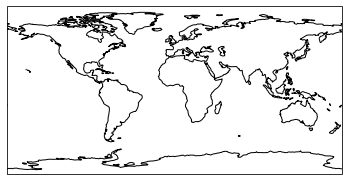

In [8]:
# Basic Plot
pc = ccrs.PlateCarree()
ax = plt.axes(projection=pc)
ax.coastlines()


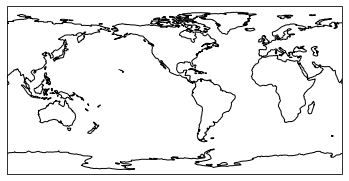

In [9]:
pc = ccrs.PlateCarree(central_longitude=-100)
ax = plt.axes(projection=pc)
ax.coastlines()


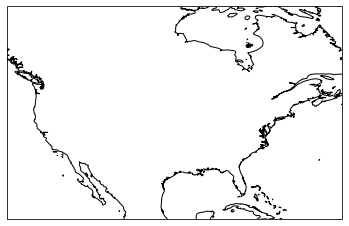

In [11]:
# Set Extent
pc = ccrs.PlateCarree()
ax = plt.axes(projection=pc)
ax.coastlines()
ax.set_extent([-130, -60, 20, 60])

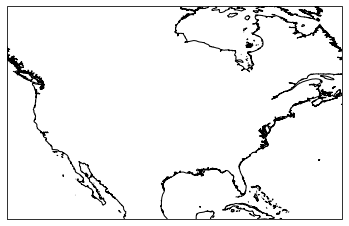

In [12]:
# Higher resolution Coastlines
pc = ccrs.PlateCarree()
ax = plt.axes(projection=pc)
ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.set_extent([-130, -60, 20, 60])


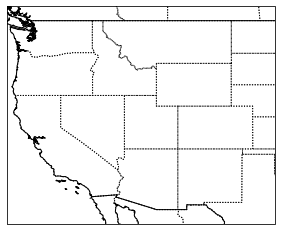

In [13]:
# States and Borders
pc = ccrs.PlateCarree()
ax = plt.axes(projection=pc)
ax.add_feature(feature.COASTLINE.with_scale('10m'))
ax.add_feature(feature.BORDERS.with_scale('10m'))
ax.add_feature(feature.STATES.with_scale('10m'), linestyle=':')
ax.set_extent([-125, -100, 30, 50])


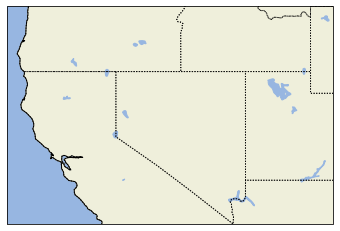

In [15]:
# Ocean and land fill
pc = ccrs.PlateCarree()
ax = plt.axes(projection=pc)
ax.add_feature(feature.OCEAN.with_scale('50m'))
ax.add_feature(feature.LAKES.with_scale('50m'))
ax.add_feature(feature.LAND.with_scale('50m'))
ax.add_feature(feature.BORDERS.with_scale('50m'))
ax.add_feature(feature.COASTLINE.with_scale('50m'))
ax.add_feature(feature.STATES.with_scale('50m'), linestyle=':')
ax.set_extent([-125, -110, 35, 45])

# Maps in Subplots
## method 1

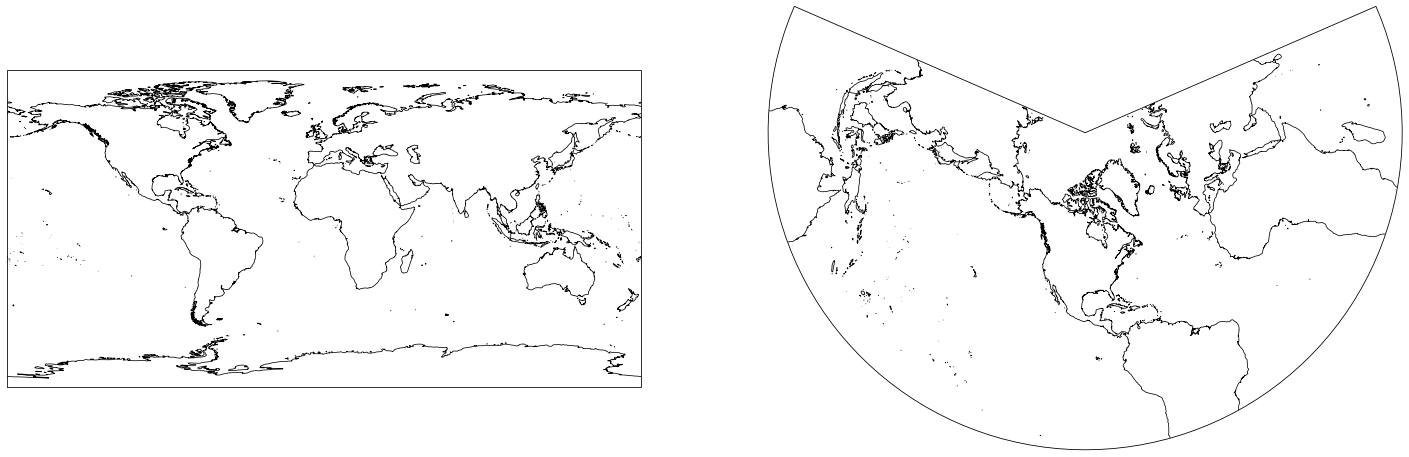

In [16]:
fig=plt.figure(figsize=(25,10))
ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax2 = plt.subplot(122, projection=ccrs.LambertConformal())
ax1.coastlines('50m', edgecolor='black', linewidth=0.75)
ax2.coastlines('50m', edgecolor='black', linewidth=0.75)

## method 2:

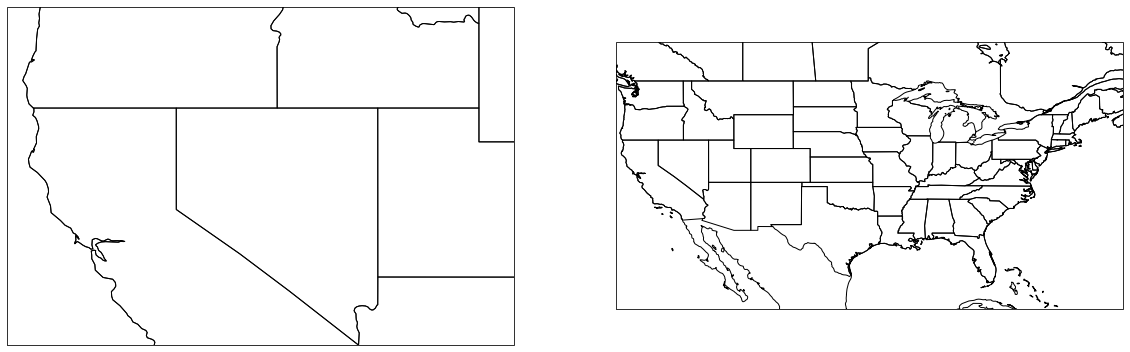

In [17]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax1.add_feature(feature.STATES.with_scale('50m'))
ax1.add_feature(feature.COASTLINE.with_scale('50m'))
ax1.set_extent([-125, -110, 35, 45])
ax2.add_feature(feature.STATES.with_scale('50m'))
ax2.add_feature(feature.COASTLINE.with_scale('50m'))
ax2.set_extent([-125, -65, 22, 50])

## method 3

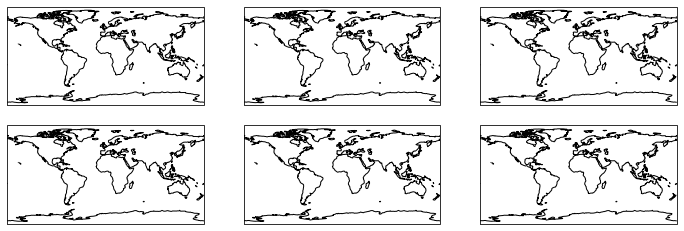

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(12,4),
 subplot_kw={'projection':ccrs.PlateCarree()})
for ax in axes.flatten():
 ax.coastlines()

# Metpy US States and Counties

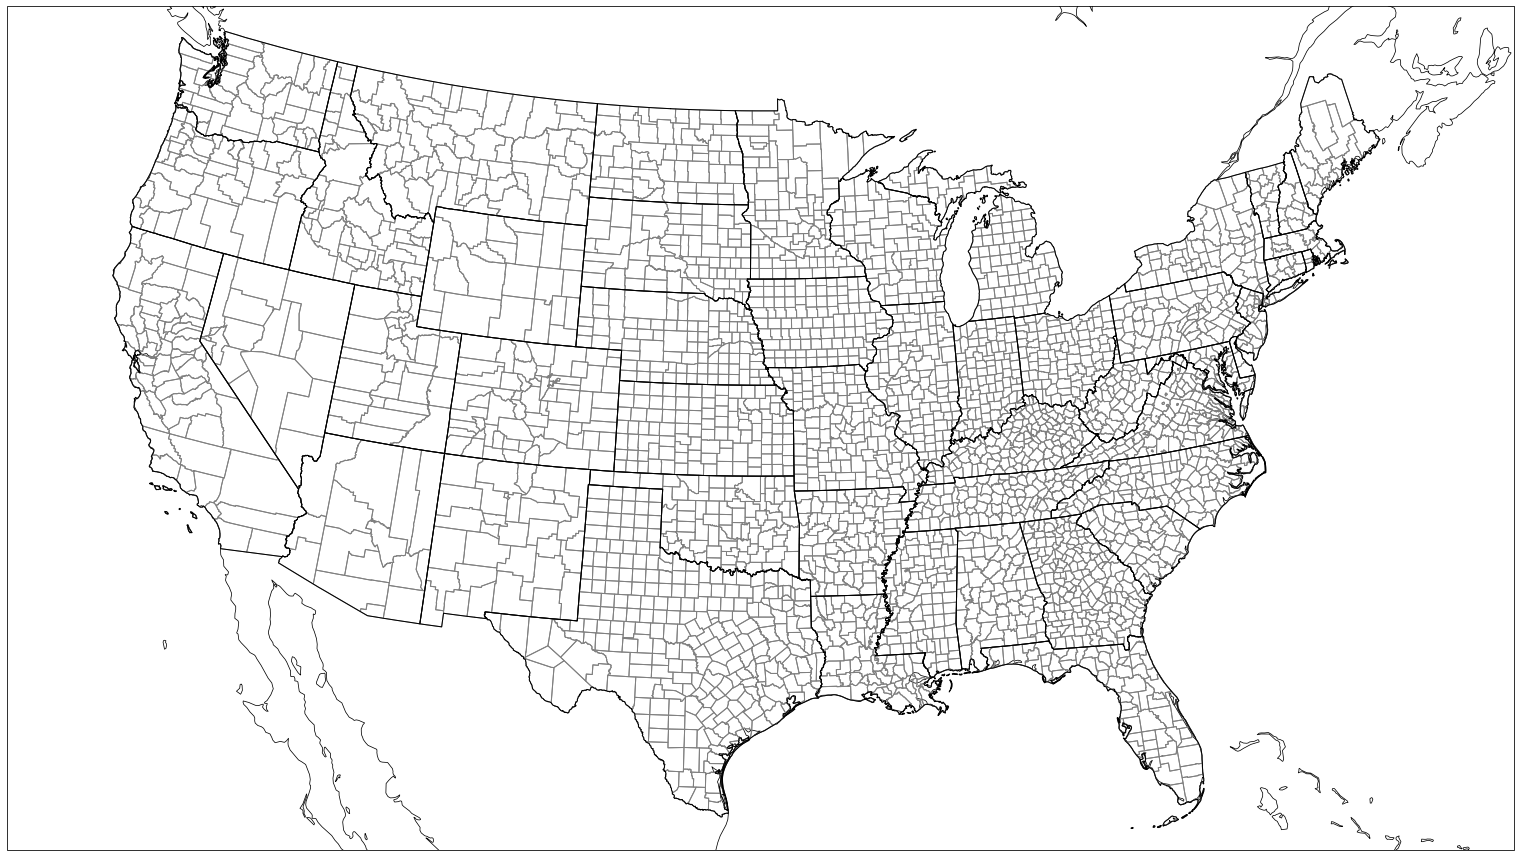

In [19]:
from metpy.plots import USCOUNTIES, USSTATES
fig=plt.figure(1,figsize=(27.,18.))
ax = plt.subplot(111, projection=ccrs.LambertConformal())
# Coastlines scale can be "110m", "50m", and "10m"
ax.coastlines('50m', edgecolor='black', linewidth=0.75)
# Metpy States/Counties scale can be '500k', '5m', or '20m'
ax.add_feature(USCOUNTIES.with_scale('5m'), edgecolor='.5')
ax.add_feature(USSTATES.with_scale('5m'), edgecolor='k')
ax.set_extent([-122, -70, 22, 50])

# Add x and y labels

Text(0.5, 1.1, 'Text on the top')

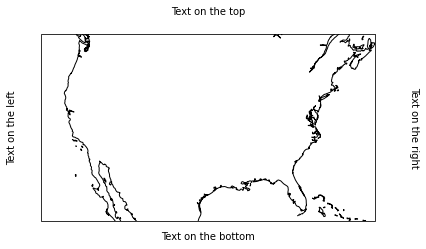

In [20]:
ax = plt.axes(projection=ccrs.LambertConformal())
ax.coastlines()
ax.set_extent([-122, -70, 22, 50])
# Usage: ax.text(x-pos, y-pos, 'text')
ax.text(.5, -.1, 'Text on the bottom', transform=ax.transAxes, ha='center')
ax.text(-.1, .5, 'Text on the left', transform=ax.transAxes, va='center', rotation=90)
ax.text(1.1, .5, 'Text on the right', transform=ax.transAxes, va='center', rotation=270)
ax.text(.5, 1.1, 'Text on the top', transform=ax.transAxes, ha='center')

# Tile Service

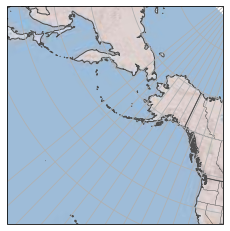

In [22]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
arcgis_url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/tile/{z}/{y}/{x}.jpg'
tiles = cimgt.GoogleTiles(url=arcgis_url)
ax = plt.axes(projection=lc)
ax.set_extent([-220, -125, 35, 70], ccrs.PlateCarree())
ax.add_image(tiles, 1)
ax.gridlines(xlocs=range(-220,-124, 5), ylocs=range(30,81,10))
#ax.add_feature(feature.OCEAN.with_scale('50m'))
#ax.add_feature(feature.LAND.with_scale('50m'))
ax.add_feature(feature.BORDERS.with_scale('50m'), edgecolor='.3')
ax.add_feature(feature.COASTLINE.with_scale('50m'), edgecolor='.3')
ax.add_feature(feature.STATES.with_scale('50m'), linestyle='-', linewidth=.25, edgecolor='.3')

# Orthographic Border Resolution
Related to Cartopy [issue #613](https://github.com/SciTools/cartopy/issues/613) on GitHub, you can change the resolution of the Orthographic boarder for better images.

See my [response](https://github.com/SciTools/cartopy/issues/613#issuecomment-748375130)

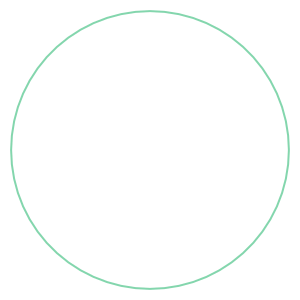

In [34]:
geo = ccrs.Geostationary()
ortho = ccrs.Orthographic()
ortho._boundary

Number of boundary points: 102


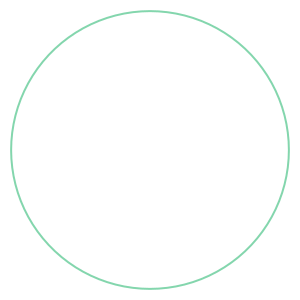

In [35]:
###############################
# Number of desired boundary points
n = 101
###############################

false_easting=geo.proj4_params['x_0']
false_northing=geo.proj4_params['y_0']
a = float(geo.globe.semimajor_axis or 6378137.0)
h = float(geo.proj4_params['h'])

### Below is taken from the cartopy Geostationary Class

# These are only exact for a spherical Earth, owing to assuming a is
# constant. Handling elliptical would be much harder for this.
sin_max_th = a / (a + h)
tan_max_th = a / np.sqrt((a + h) ** 2 - a ** 2)

# Using Napier's rules for right spherical triangles
# See R2 and R6 (x and y coords are h * b and h * a, respectively):
# https://en.wikipedia.org/wiki/Spherical_trigonometry
t = np.linspace(0, -2 * np.pi, n)  # Clockwise boundary.
coords = np.vstack([np.arctan(tan_max_th * np.cos(t)),
                    np.arcsin(sin_max_th * np.sin(t))])
coords *= h
coords += np.array([[false_easting], [false_northing]])
geo._set_boundary(coords)

print('Number of boundary points:', len(geo.boundary.xy[0]))


# Re-implement the cartopy code to figure out the boundary.
import shapely.geometry as sgeom
a = float(ortho.globe.semimajor_axis or 6378137.0)
b = float(ortho.globe.semiminor_axis or a)
coords = ccrs._ellipse_boundary(a * 0.99999, b * 0.99999, n=101)
# Update the projection's boundary.
ortho._boundary = sgeom.polygon.LinearRing(coords.T)

ortho._boundary

# Transform Resolution
The default resolution for transforms when plotting lines like great circles is usually too low, but we can increase the resolution in a roundabout way. For 
example:

More dtails: 
- https://stackoverflow.com/questions/40270990/cartopy-higher-resolution-for-great-circle-distance-line
- https://github.com/SciTools/cartopy/issues/8

In [38]:
class newOrtho(ccrs.Orthographic):
    @property
    def threshold(self):
        return .5
crs = newOrtho(central_longitude=-118, central_latitude=35)
# then make the great circle using the above crs as the projection for the axis


AttributeError: can't set attribute

# Clip Text
When you have text on a cartopy axes that extends beyond the map extend, the text shows. This is undesireable. Just remember to set the clip_on=True


In [40]:
# ax.text(lon, lat, 'string', clip_on=True)